# **Loan Status Prediction Model**

### **Libraries Used**

In [214]:
# Dataset Manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model Preprocessing
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,cross_val_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder,StandardScaler

# Model Creation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

# Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report

# Model Export
import pickle

### **Dataset Load**

In [215]:
df = pd.read_csv('dataset/loan_data_4.csv')
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


### **Data Preprocessing 1**

#### **Dataset About**

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [217]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


* Age has a very high value
* Person income's are way higher than the loan amount
* Employee Experience is way too high
* Loan Percent Income will be removed

In [218]:
df.duplicated().sum()

np.int64(0)

#### **New Dataset**

In [219]:
df_new = df.copy()

In [220]:
df_new.columns = df_new.columns.str.strip()
df_new.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [221]:
df_new.rename(columns={'person_age':'age', 
                        'person_gender':'gender', 
                        'person_education':'education', 
                        'person_income':'income',
                        'person_emp_exp':'experience', 
                        'person_home_ownership':'home_ownership', 
                        'loan_amnt':'loan_amount', 
                        'cb_person_cred_hist_length':'credit_history',
                        'previous_loan_defaults_on_file':'loan_defaults'},inplace=True)

In [222]:
df_new.columns

Index(['age', 'gender', 'education', 'income', 'experience', 'home_ownership',
       'loan_amount', 'loan_intent', 'loan_int_rate', 'loan_percent_income',
       'credit_history', 'credit_score', 'loan_defaults', 'loan_status'],
      dtype='object')

In [223]:
# Unwanted Column
df_new = df_new.drop(columns=['loan_percent_income','loan_defaults'])

In [224]:
# Assuming its USD and converting into INR
df_new['income'] *= 83
df_new['loan_amount'] *= 83

In [225]:
# Feature classes into Title format
for i in df_new.select_dtypes("object").columns:
    df_new[i] = df_new[i].str.title()

In [226]:
df_new.head()

,age,gender,education,income,experience,home_ownership,loan_amount,loan_intent,loan_int_rate,credit_history,credit_score,loan_status
0,22.0,Female,Master,5971684.0,0,Rent,2905000.0,Personal,16.02,3.0,561,1
1,21.0,Female,High School,1019406.0,0,Own,83000.0,Education,11.14,2.0,504,0
2,25.0,Female,High School,1032354.0,3,Mortgage,456500.0,Medical,12.87,3.0,635,1
3,23.0,Female,Bachelor,6619499.0,0,Rent,2905000.0,Medical,15.23,2.0,675,1
4,24.0,Male,Master,5489205.0,1,Rent,2905000.0,Medical,14.27,4.0,586,1


#### **Outlier Detection**

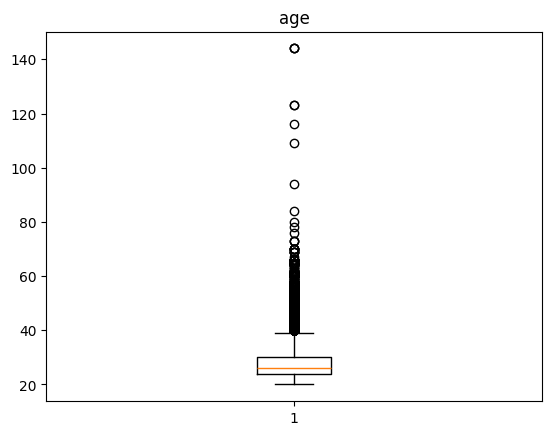

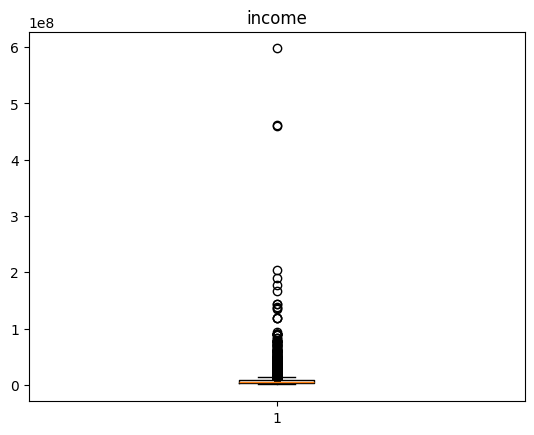

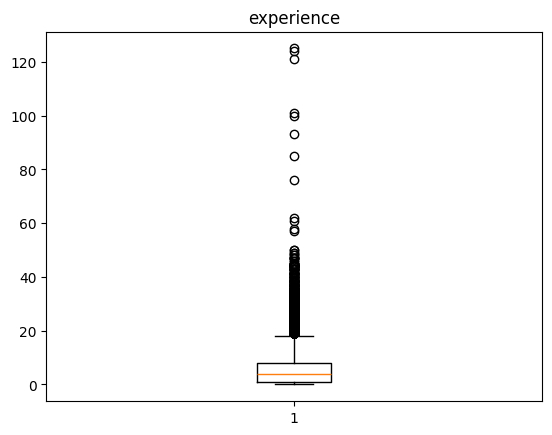

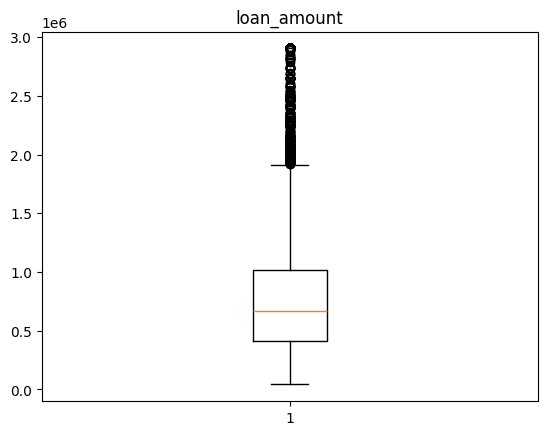

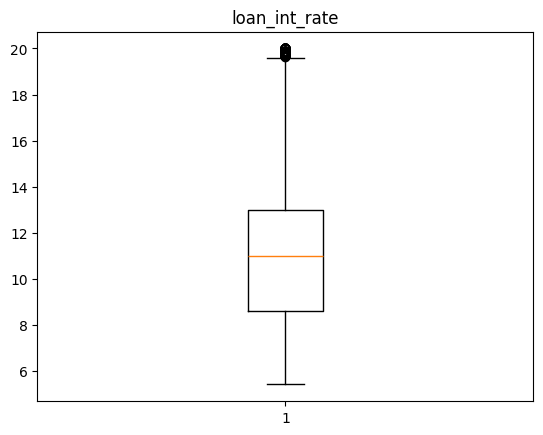

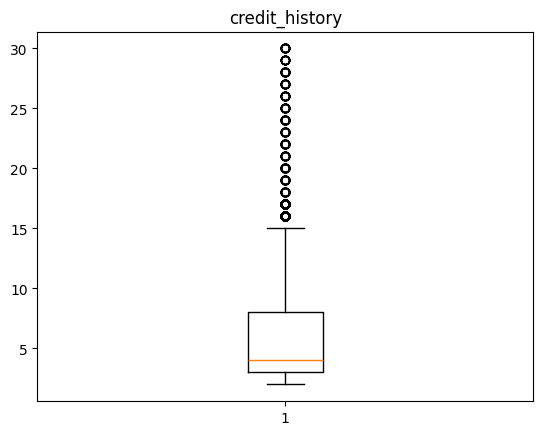

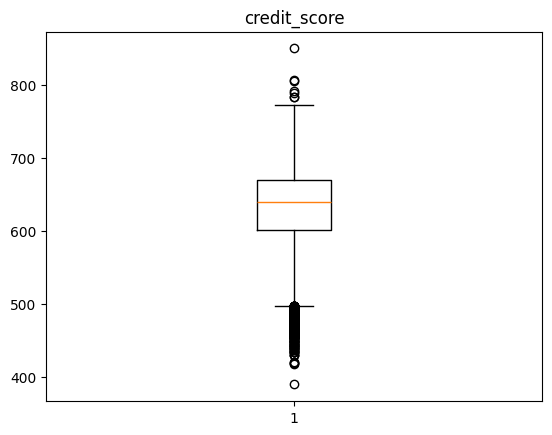

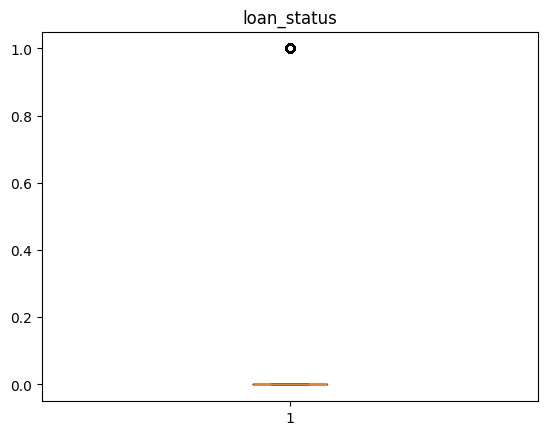

In [227]:
for i in df_new.select_dtypes('number').columns:
    plt.boxplot(df_new[i])
    plt.title(i)
    plt.show()
    print()

* Heavy presence of Outliers
* Mostly in age, income & experience

In [228]:
for i in df_new.select_dtypes('object').columns:
    print(df_new[i].value_counts())
    print()

gender
Male      24841
Female    20159
Name: count, dtype: int64

education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

home_ownership
Rent        23443
Mortgage    18489
Own          2951
Other         117
Name: count, dtype: int64

loan_intent
Education            9153
Medical              8548
Venture              7819
Personal             7552
Debtconsolidation    7145
Homeimprovement      4783
Name: count, dtype: int64



#### **Outlier Handling**

In [229]:
df_cleaned = df_new.copy()
df_cleaned

,age,gender,education,income,experience,home_ownership,loan_amount,loan_intent,loan_int_rate,credit_history,credit_score,loan_status
0,22.0,Female,Master,5971684.0,0,Rent,2905000.0,Personal,16.02,3.0,561,1
1,21.0,Female,High School,1019406.0,0,Own,83000.0,Education,11.14,2.0,504,0
2,25.0,Female,High School,1032354.0,3,Mortgage,456500.0,Medical,12.87,3.0,635,1
3,23.0,Female,Bachelor,6619499.0,0,Rent,2905000.0,Medical,15.23,2.0,675,1
4,24.0,Male,Master,5489205.0,1,Rent,2905000.0,Medical,14.27,4.0,586,1
...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,Male,Associate,3981593.0,6,Rent,1245000.0,Medical,15.66,3.0,645,1
44996,37.0,Female,Associate,5461400.0,17,Rent,747000.0,Homeimprovement,14.07,11.0,621,1
44997,33.0,Male,Associate,4726186.0,7,Rent,229993.0,Debtconsolidation,10.02,10.0,668,1
44998,29.0,Male,Bachelor,2752612.0,4,Rent,996000.0,Education,13.23,6.0,604,1


In [230]:
df_cleaned = df_cleaned[(df_cleaned['age'] <= 70) &
                        (df_cleaned['experience'] <= 40) &
                        (df_cleaned['credit_history'] <= 20) &
                        (df_cleaned['credit_score'] >= 400) &
                        (df_cleaned['home_ownership'] != 'Other')]

In [231]:
q1 = df_cleaned['income'].quantile(0.25)
q3 = df_cleaned['income'].quantile(0.75)
iqr = q3-q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df_cleaned = df_cleaned[(df_cleaned['income'] >= lower_bound) & (df_cleaned['income'] <= upper_bound)]

In [232]:
df_cleaned

,age,gender,education,income,experience,home_ownership,loan_amount,loan_intent,loan_int_rate,credit_history,credit_score,loan_status
0,22.0,Female,Master,5971684.0,0,Rent,2905000.0,Personal,16.02,3.0,561,1
1,21.0,Female,High School,1019406.0,0,Own,83000.0,Education,11.14,2.0,504,0
2,25.0,Female,High School,1032354.0,3,Mortgage,456500.0,Medical,12.87,3.0,635,1
3,23.0,Female,Bachelor,6619499.0,0,Rent,2905000.0,Medical,15.23,2.0,675,1
4,24.0,Male,Master,5489205.0,1,Rent,2905000.0,Medical,14.27,4.0,586,1
...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,Male,Associate,3981593.0,6,Rent,1245000.0,Medical,15.66,3.0,645,1
44996,37.0,Female,Associate,5461400.0,17,Rent,747000.0,Homeimprovement,14.07,11.0,621,1
44997,33.0,Male,Associate,4726186.0,7,Rent,229993.0,Debtconsolidation,10.02,10.0,668,1
44998,29.0,Male,Bachelor,2752612.0,4,Rent,996000.0,Education,13.23,6.0,604,1


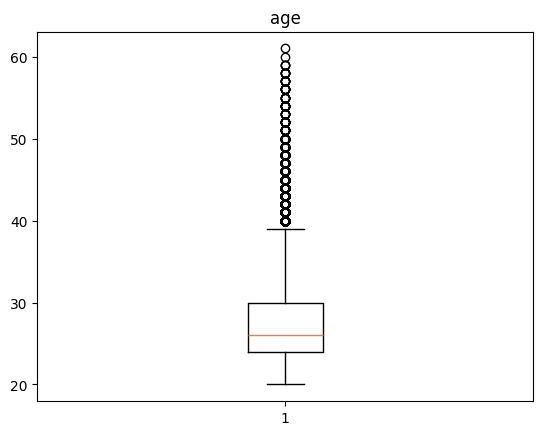

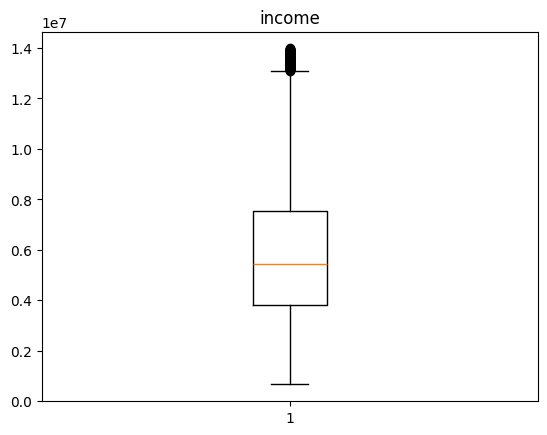

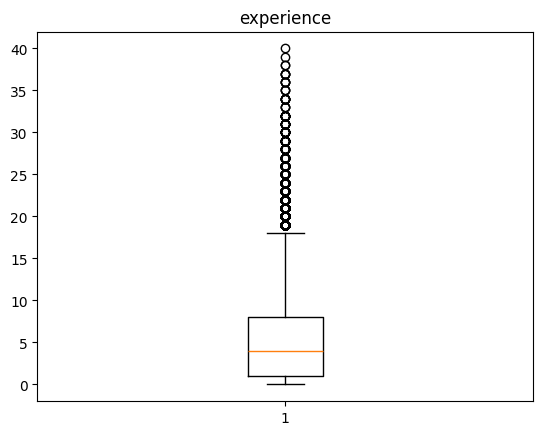

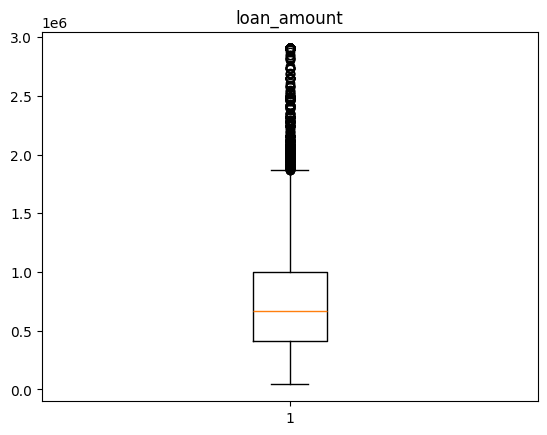

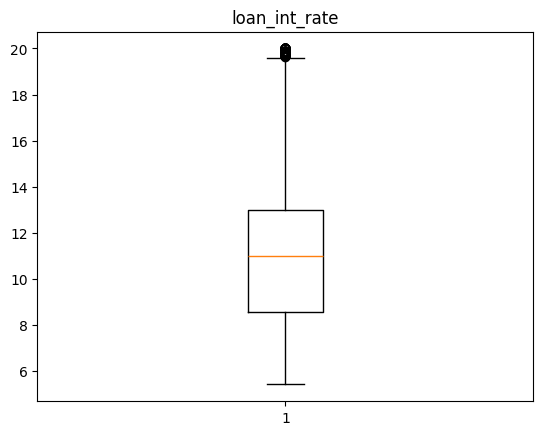

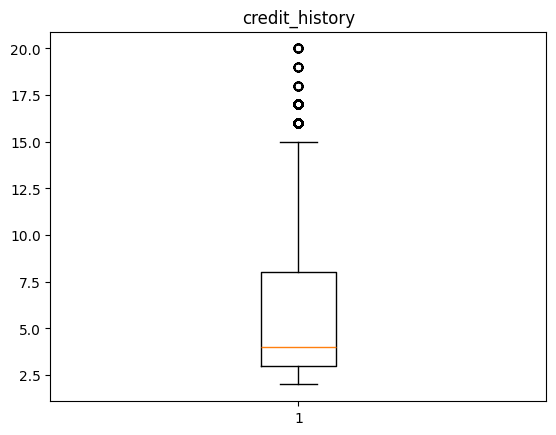

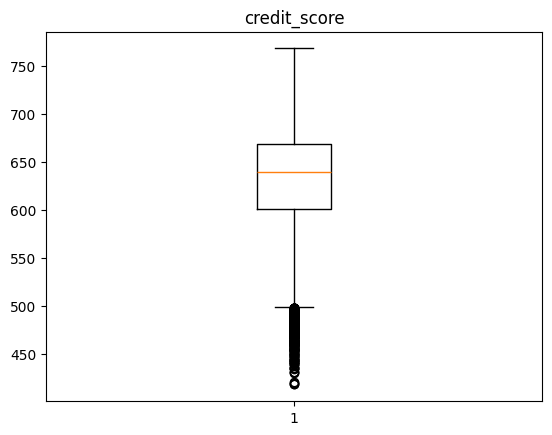

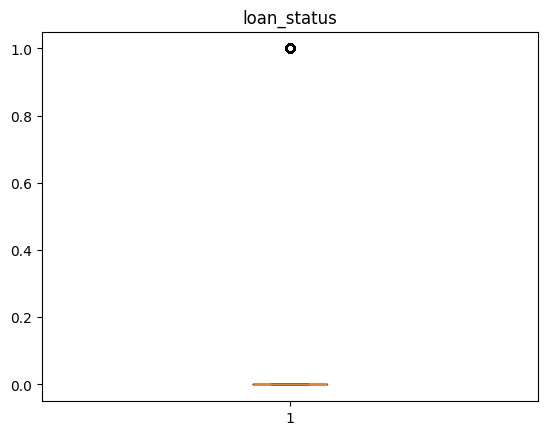

In [233]:
for i in df_cleaned.select_dtypes('number').columns:
    plt.boxplot(df_cleaned[i])
    plt.title(i)
    plt.show()
    print()

* Still not satisfied with the result income is higher than the loan amount (like `x5 times` higher).
* Most of the outlier values here are not an outlier on real world scenarios.

### **EDA**

#### **Data Visualization**

In [234]:
df_eda = df_cleaned.copy()

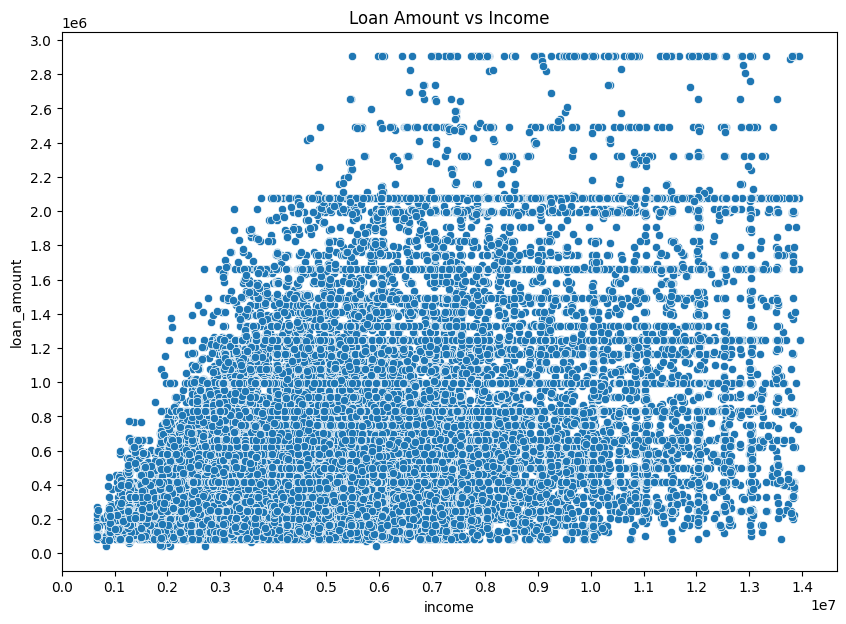

In [235]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df_eda['income'],y=df_eda['loan_amount'])
plt.title('Loan Amount vs Income')
plt.xticks(ticks=np.arange(0.0,1.5e7,0.1e7))
plt.yticks(ticks=np.arange(0.0,3.1e6,0.2e6))
plt.show()

* the income being too higher than the loan amount still is distributed well. 

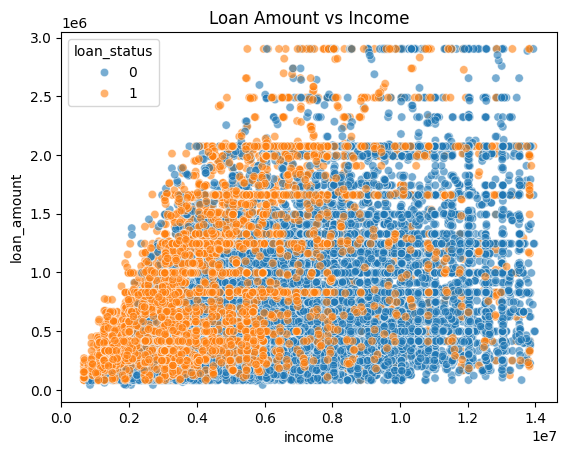

In [236]:
sns.scatterplot(x='income', y='loan_amount', hue='loan_status', data=df_eda, alpha=0.6)
plt.title('Loan Amount vs Income')
plt.show()

* Most approved loans are on income category under `0.8*1e7`.
* How is higher income people getting rejected for loan?
* Should try removing the income level above `0.9*1e7` or `1e7`.

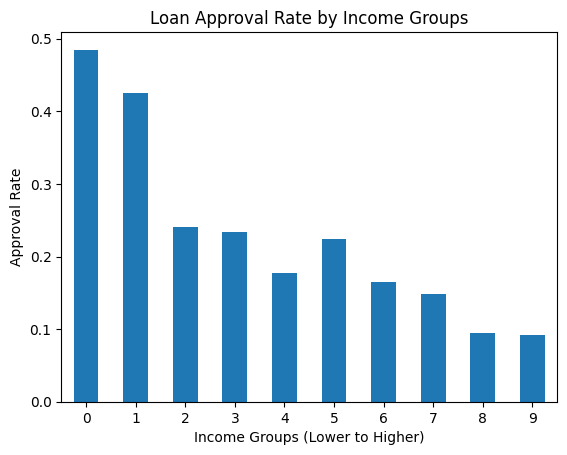

In [237]:
df_eda['income_groups'] = pd.qcut(df_eda['income'], 10, labels=False)
approval_rate = df_eda.groupby('income_groups')['loan_status'].mean()
approval_rate.plot(kind='bar')
plt.title('Loan Approval Rate by Income Groups')
plt.xlabel('Income Groups (Lower to Higher)')
plt.ylabel('Approval Rate')
plt.xticks(rotation=0)
plt.show()

* Low incomes are approved more maybe their loan amounts are lower.

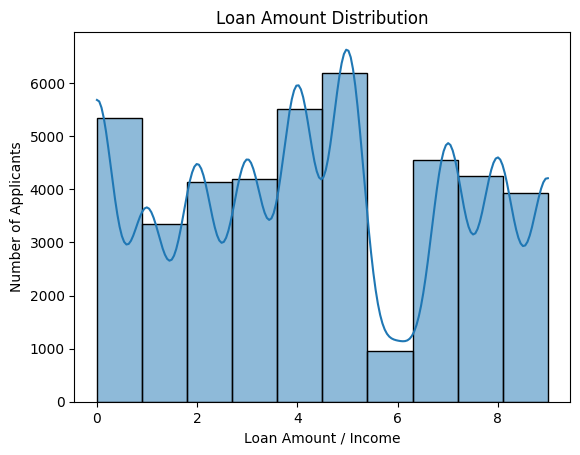

In [238]:
df_eda['loan_groups'] = pd.qcut(df_eda['loan_amount'],10,labels=False)

sns.histplot(df_eda['loan_groups'], bins=10, kde=True)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount / Income')
plt.ylabel('Number of Applicants')
plt.show()

<Axes: >

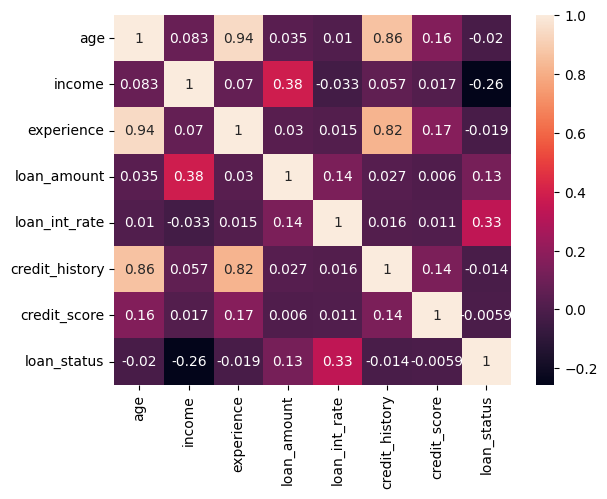

In [239]:
sns.heatmap(df_cleaned.corr(numeric_only=True),annot=True)

#### **Income Adjust**

In [240]:
df_cleaned = df_cleaned[df_cleaned['income'] <= 1e7]
df_cleaned = df_cleaned[df_cleaned['loan_amount'] <= 2e6]
# df_cleaned['income'] /= 10

In [241]:
df_cleaned.describe()

,age,income,experience,loan_amount,loan_int_rate,credit_history,credit_score,loan_status
count,37406.000000,3.740600e+04,37406.000000,3.740600e+04,37406.000000,37406.000000,37406.000000,37406.000000
mean,27.350345,5.227715e+06,5.022403,6.974506e+05,10.948692,5.633348,632.012993,0.236246
std,5.410653,2.032545e+06,5.414406,4.145292e+05,2.954478,3.556523,50.233030,0.424780
min,20.000000,6.640000e+05,0.000000,4.150000e+04,5.420000,2.000000,418.000000,0.000000
25%,23.000000,3.644572e+06,1.000000,3.984000e+05,8.490000,3.000000,601.000000,0.000000
50%,26.000000,5.057190e+06,3.000000,6.225000e+05,11.010000,4.000000,639.000000,0.000000
75%,30.000000,6.625932e+06,7.000000,9.545000e+05,12.990000,8.000000,669.000000,0.000000
max,61.000000,9.999093e+06,39.000000,1.999304e+06,20.000000,20.000000,768.000000,1.000000


### **Data Preprocessing 2**

#### **Model Details Dictionary**

In [242]:
model_dict = {}

#### **Features & Label**

In [243]:
x = df_cleaned.drop(columns=['loan_status'])
y = df_cleaned['loan_status']

#### **Imbalance Handling**

In [244]:
y.value_counts()

loan_status
0    28569
1     8837
Name: count, dtype: int64

In [245]:
ros = RandomOverSampler()
x_res,y_res = ros.fit_resample(x,y)

In [246]:
y_res.value_counts()

loan_status
0    28569
1    28569
Name: count, dtype: int64

#### **Data Splitting**

In [247]:
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.2,random_state=42)

#### **Data Encoding**

In [248]:
obj_cols = x_train.select_dtypes('object').columns
obj_cols

Index(['gender', 'education', 'home_ownership', 'loan_intent'], dtype='object')

In [249]:
le_gender = LabelEncoder()
x_train['gender'] = le_gender.fit_transform(x_train['gender'])

le_education = LabelEncoder()
x_train['education'] = le_education.fit_transform(x_train['education'])

le_home_ownership = LabelEncoder()
x_train['home_ownership'] = le_home_ownership.fit_transform(x_train['home_ownership'])

le_loan_intent = LabelEncoder()
x_train['loan_intent'] = le_loan_intent.fit_transform(x_train['loan_intent'])

# le_loan_defaults = LabelEncoder()
# x_train['loan_defaults'] = le_loan_defaults.fit_transform(x_train['loan_defaults'])

In [250]:
x_train

,age,gender,education,income,experience,home_ownership,loan_amount,loan_intent,loan_int_rate,credit_history,credit_score
18573,32.0,1,1,3067016.0,10,2,498000.0,5,12.61,5.0,630
46526,21.0,1,4,1558159.0,0,1,263525.0,2,11.54,3.0,686
41518,27.0,0,0,3071996.0,7,2,332000.0,1,12.69,7.0,664
30799,27.0,1,0,3567091.0,8,2,581000.0,3,11.13,5.0,622
32321,23.0,1,1,4270433.0,0,0,996000.0,4,15.20,3.0,470
...,...,...,...,...,...,...,...,...,...,...,...
54343,31.0,0,1,2985759.0,7,2,1251225.0,3,11.01,10.0,659
38158,23.0,1,4,2968080.0,0,2,498000.0,1,7.88,3.0,625
860,22.0,1,0,4471708.0,0,2,1328000.0,1,16.35,3.0,642
15795,30.0,1,1,2446591.0,7,0,498000.0,2,8.94,7.0,632


In [251]:
model_dict['gender'] = le_gender
model_dict['education'] = le_education
model_dict['home_ownership'] = le_home_ownership
model_dict['loan_intent'] = le_loan_intent
# model_dict['loan_defaults'] = le_loan_defaults

model_dict

{'gender': LabelEncoder(),
 'education': LabelEncoder(),
 'home_ownership': LabelEncoder(),
 'loan_intent': LabelEncoder()}

#### **Correlation Check**

In [252]:
df_encoded = x_train.join(y_train)
df_encoded.head()

,age,gender,education,income,experience,home_ownership,loan_amount,loan_intent,loan_int_rate,credit_history,credit_score,loan_status
18573,32.0,1,1,3067016.0,10,2,498000.0,5,12.61,5.0,630,1
46526,21.0,1,4,1558159.0,0,1,263525.0,2,11.54,3.0,686,1
41518,27.0,0,0,3071996.0,7,2,332000.0,1,12.69,7.0,664,1
30799,27.0,1,0,3567091.0,8,2,581000.0,3,11.13,5.0,622,0
32321,23.0,1,1,4270433.0,0,0,996000.0,4,15.20,3.0,470,0


In [253]:
df_encoded.corr(numeric_only=True)['loan_status'].sort_values(ascending=False)

loan_status       1.000000
loan_int_rate     0.372032
home_ownership    0.278490
loan_amount       0.133331
education         0.007041
gender           -0.000434
credit_score     -0.013408
credit_history   -0.021203
experience       -0.026013
age              -0.026341
loan_intent      -0.081649
income           -0.330693
Name: loan_status, dtype: float64

#### **Normalization**

In [254]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_train)

In [255]:
model_dict['scaler'] = scaler
model_dict

{'gender': LabelEncoder(),
 'education': LabelEncoder(),
 'home_ownership': LabelEncoder(),
 'loan_intent': LabelEncoder(),
 'scaler': StandardScaler()}

#### **Test Data Transform**

In [256]:
x_test.head()

,age,gender,education,income,experience,home_ownership,loan_amount,loan_intent,loan_int_rate,credit_history,credit_score
8565,24.0,Male,Bachelor,2214523.0,2,Rent,415000.0,Education,6.99,3.0,604
6481,25.0,Male,Associate,6062486.0,1,Rent,581000.0,Medical,9.25,2.0,657
5692,24.0,Male,High School,3305475.0,0,Rent,498000.0,Homeimprovement,13.49,3.0,637
43053,31.0,Male,High School,4000185.0,6,Mortgage,996000.0,Homeimprovement,13.30,7.0,560
26625,36.0,Male,Associate,5403134.0,12,Rent,132800.0,Medical,12.21,16.0,640


In [257]:
x_test['gender'] = model_dict['gender'].transform(x_test['gender'])
x_test['education'] = model_dict['education'].transform(x_test['education'])
x_test['home_ownership'] = model_dict['home_ownership'].transform(x_test['home_ownership'])
x_test['loan_intent'] = model_dict['loan_intent'].transform(x_test['loan_intent'])
# x_test['loan_defaults'] = model_dict['loan_defaults'].transform(x_test['loan_defaults'])

In [258]:
x_test.head()

,age,gender,education,income,experience,home_ownership,loan_amount,loan_intent,loan_int_rate,credit_history,credit_score
8565,24.0,1,1,2214523.0,2,2,415000.0,1,6.99,3.0,604
6481,25.0,1,0,6062486.0,1,2,581000.0,3,9.25,2.0,657
5692,24.0,1,3,3305475.0,0,2,498000.0,2,13.49,3.0,637
43053,31.0,1,3,4000185.0,6,0,996000.0,2,13.30,7.0,560
26625,36.0,1,0,5403134.0,12,2,132800.0,3,12.21,16.0,640


### **Model Selection**

In [259]:
models = [KNeighborsClassifier(),SVC(),GaussianNB(),DecisionTreeClassifier()]

for i in models:
    print(i)
    i.fit(x_train,y_train)
    y_pred = i.predict(x_test)
    # print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print()

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.85      0.76      0.80      5670
           1       0.79      0.87      0.83      5758

    accuracy                           0.81     11428
   macro avg       0.82      0.81      0.81     11428
weighted avg       0.82      0.81      0.81     11428


SVC()
              precision    recall  f1-score   support

           0       0.65      0.80      0.72      5670
           1       0.75      0.59      0.66      5758

    accuracy                           0.69     11428
   macro avg       0.70      0.69      0.69     11428
weighted avg       0.70      0.69      0.69     11428


GaussianNB()
              precision    recall  f1-score   support

           0       0.69      0.61      0.65      5670
           1       0.66      0.74      0.69      5758

    accuracy                           0.67     11428
   macro avg       0.67      0.67      0.67     11428
weighted avg       0.67      0

* Decision Tree already provides the best performance (95%)
* Lets try Ensemble techniques also also

### **Ensemble Techniques**

In [260]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      5670
           1       0.95      0.98      0.96      5758

    accuracy                           0.96     11428
   macro avg       0.96      0.96      0.96     11428
weighted avg       0.96      0.96      0.96     11428



In [261]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_pred = gbc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      5670
           1       0.84      0.80      0.82      5758

    accuracy                           0.82     11428
   macro avg       0.82      0.82      0.82     11428
weighted avg       0.82      0.82      0.82     11428



* Random Forest gives best result 96%

### **Hyperparameter Tuning**

In [262]:
params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'max_features': ['sqrt', 'log2']
}

gbc = GradientBoostingClassifier()
random_search = RandomizedSearchCV(gbc,params,n_iter=50,scoring='roc_auc',cv=5,verbose=2,random_state=42,n_jobs=-1)

random_search.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 3, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 1.0]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [263]:
gbc_best = GradientBoostingClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=5,n_estimators=300,
                                      random_state=42, subsample=0.8)
gbc_best.fit(x_train,y_train)
y_pred = gbc_best.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      5670
           1       0.89      0.84      0.87      5758

    accuracy                           0.87     11428
   macro avg       0.87      0.87      0.87     11428
weighted avg       0.87      0.87      0.87     11428



* Random Forest has the highest score but it's not good on real data

### **Cross Validation**

In [264]:
cvs = cross_val_score(rfc,x_train,y_train,cv=5,scoring='accuracy')
print(cvs)
print(cvs.mean())

[0.95351127 0.95132356 0.95383942 0.95241741 0.95187049]
0.9525924305403631


In [265]:
model_dict['model'] = gbc_best

### **Model Export**

In [266]:
model_dict
with open('Loan_Status_Model.pkl','wb') as f:
    pickle.dump(model_dict,f)

### **Model Testing**

In [267]:
df_custom = [
    # "prediction": "✅ Approved",
    {
        "age": 40,
        "gender": "Male",
        "education": "Master",
        "income": 1800000,
        "experience": 15,
        "home_ownership": "Own",
        "loan_amount": 400000,
        "loan_intent": "Homeimprovement",
        "loan_int_rate": 8,
        "credit_history": 15,
        "credit_score": 820,
        # "loan_defaults": "No"
    },
    # "prediction": "❌ Rejected",
    {
        "age": 21,
        "gender": "Female",
        "education": "High School",
        "income": 150000,
        "experience": 0,
        "home_ownership": "Rent",
        "loan_amount": 500000,
        "loan_intent": "Medical",
        "loan_int_rate": 18,
        "credit_history": 1,
        "credit_score": 400,
        # "loan_defaults": "Yes"
    },
    # "prediction": "⚠️ Borderline",
    {
        "age": 30,
        "gender": "Male",
        "education": "Bachelor",
        "income": 480000,
        "experience": 6,
        "home_ownership": "Mortgage",
        "loan_amount": 350000,
        "loan_intent": "Education",
        "loan_int_rate": 13.0,
        "credit_history": 3,
        "credit_score": 660,
        # "loan_defaults": "Yes"
    }
]

In [268]:
df_custom_test = pd.DataFrame(df_custom)

# Encoding
df_custom_test['gender'] = model_dict['gender'].transform(df_custom_test['gender'])
df_custom_test['education'] = model_dict['education'].transform(df_custom_test['education'])
df_custom_test['home_ownership'] = model_dict['home_ownership'].transform(df_custom_test['home_ownership'])
df_custom_test['loan_intent'] = model_dict['loan_intent'].transform(df_custom_test['loan_intent'])
# df_custom_test['loan_defaults'] = model_dict['loan_defaults'].transform(df_custom_test['loan_defaults'])

# Scaling
df_custom_scaled = model_dict['scaler'].transform(df_custom_test)
df_custom_scaled = pd.DataFrame(df_custom_scaled, columns=df_custom_test.columns)

# Predicting
pred = model_dict['model'].predict(df_custom_scaled)
prob = model_dict['model'].predict_proba(df_custom_scaled)

In [269]:
for i,j in zip(pred,prob):
    print(i,round(j[1]*100))

0 19
0 12
0 15
